<a href="https://colab.research.google.com/github/Kevin1732/3d-pose-warping/blob/master/Copy_of_3D_pose_warping_task1_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset exploration


*   Explore the **In-shop Clothes Retrieval Benchmark** of the **DeepFashion** dataset
http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion/InShopRetrieval.html
*   Import the dataset in `Google Colab` instead of downloading the whole dataset locally
*   Visualize some samples from the dataset
*   Look for variations and correlations in the dataset
*   Use the `matplotlib` and `seaborn` library to visualize data



In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [5]:
!unzip "/content/drive/MyDrive/img.zip" -d "/content/drive/MyDrive/imgdataset"

  inflating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001761/01_7_additional.jpg  
   creating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001762/
  inflating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001762/02_1_front.jpg  
  inflating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001762/02_3_back.jpg  
  inflating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001762/02_7_additional.jpg  
   creating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001798/
  inflating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001798/02_1_front.jpg  
  inflating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001798/02_3_back.jpg  
  inflating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001798/02_7_additional.jpg  
   creating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001805/
  inflating: /content/drive/MyDrive/imgdataset/img/WOMEN/Dresses/id_00001805/02_1_front.jpg  
 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
img_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/imgdataset/img",
    image_size=(256,256)
)

Found 19665 files belonging to 2 classes.


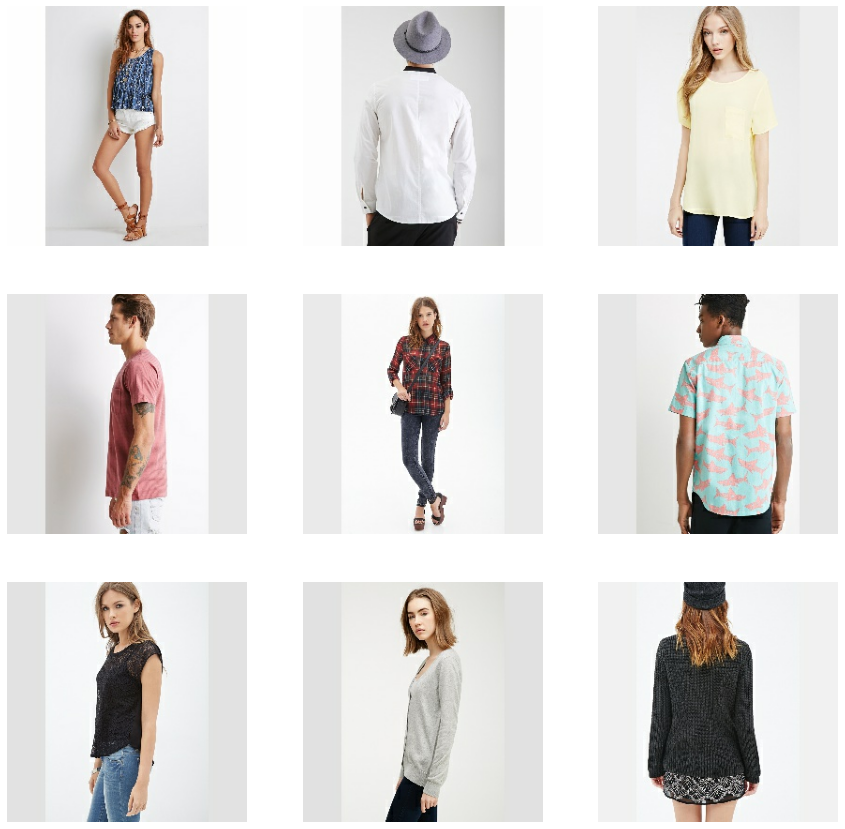

In [22]:
plt.figure(figsize=(15, 15))
for images,labels in img_data.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

plt.show()


# ResNET Architecture



*   Read about **ResNET** architecture and advantage of residual blocks
*   Build a simple 6-layer ConvNET and train it on **CIFAR-10** dataset
*   Introduce residual blocks in the above model and compare the results 
*   Use the `tensorflow` library to import ResNET model with imgaenet weights
*   Change some parameters and document the results
*   Visualize the output of some layers and add/delete layers to see the effect of individual layers on the model accuracy



In [29]:

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)         

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

scores = model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


  28/1563 [..............................] - ETA: 3:48 - loss: 1.9682 - accuracy: 0.2887

KeyboardInterrupt: ignored




























This is ResNet 
I couldnt find time to run and compare their accuracies .

In [34]:
# Import Keras modules and its important APIs
from tensorflow import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

In [51]:
#ResNet



batch_size = 32  # original ResNet paper uses batch_size = 128 for training
epochs = 10
data_augmentation = True
num_classes = 10
  
# Data Preprocessing 
subtract_pixel_mean = False
n = 3
  
# Select ResNet Version
version = 1
  
# Computed depth of 
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2
  
# Model name, depth and version
model_type = 'ResNet % dv % d' % (depth, version)
  
# Load the CIFAR-10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
  
# Input image dimensions.
input_shape = x_train.shape[1:]
  
# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
  
# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis = 0)
    x_train -= x_train_mean
    x_test -= x_train_mean
  
# Print Training and Test Samples 
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)
  
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr





x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [52]:
def resnet_layer(inputs,
                 num_filters = 16,
                 kernel_size = 3,
                 strides = 1,
                 activation ='relu',
                 batch_normalization = True,):
    conv = Conv2D(num_filters,
                  kernel_size = kernel_size,
                  strides = strides,
                  padding ='same',
                  kernel_initializer ='he_normal',
                  kernel_regularizer = l2(1e-4))
    x = inputs
    x = conv(x)
    if activation is not None:
      x = Activation(activation)(x)
    return x


def resnet_v1(input_shape, depth, num_classes = 10):

  inputs = Input(shape = input_shape)
  x = resnet_layer(inputs = inputs)
  y = resnet_layer(inputs = x)
  y = resnet_layer(inputs = y, activation = None)
  x = keras.layers.add([x, y])
  x = Activation('relu')(x)
  y = resnet_layer(inputs = x)
  y = resnet_layer(inputs = y, activation = None)
  x = keras.layers.add([x, y])
  x = Activation('relu')(x)

  x = AveragePooling2D(pool_size = 8)(x)
  y = Flatten()(x)
  outputs = Dense(num_classes,
                    activation ='softmax',
                    kernel_initializer ='he_normal')(y)
  
  # Instantiate model.
  model = Model(inputs = inputs, outputs = outputs)
  return model


In [53]:
model = resnet_v1(input_shape = input_shape, depth = depth)
model.compile(loss ='categorical_crossentropy',
              optimizer = Adam(learning_rate = 1e-3),
              metrics =['accuracy'])
model.summary()
print(model_type)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 32, 32, 16)   448         input_4[0][0]                    
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 32, 32, 16)   0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 16)   2320        activation_10[0][0]              
____________________________________________________________________________________________

In [55]:

history = model.fit(x_train, y_train,
              batch_size = batch_size,
              epochs = epochs,
              validation_data =(x_test, y_test),
              shuffle = True,)
              #callbacks = callbacks)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

scores = model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
  76/1563 [>.............................] - ETA: 3:38 - loss: 1.9416 - accuracy: 0.3006

KeyboardInterrupt: ignored